In [1]:
# Basic Libraries of AI
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier


# Fashion-mnist Dataset

In [3]:
fashion_train=pd.read_csv("fashion-mnist_train.csv") # training dataset
fashion_test=pd.read_csv("fashion-mnist_test.csv")   # testing dataset

In [4]:
fashion_train.shape  #shape of training dataset already in -2D

(60000, 785)

In [5]:
# Input(X) and Output(Y) splitting from both training data and testing data

X_train_fashion = fashion_train.drop('label',axis = 1)
y_train_fashion = fashion_train['label']
X_test_fashion = fashion_test.drop('label',axis = 1)
y_test_fashion = fashion_test['label']

# Reshaping the dataset from 2-D to 3-D for visualization purpose because only 3-D can visulaize images...

In [7]:
#Reshaping the dataset from 2-D to 3-D for visualization purpose because only 3-D can visulaize images...

x_train_reshape = X_train_fashion.values.reshape(60000,28,28)
x_test_reshape = X_test_fashion.values.reshape(-1,28,28) # instead of overall count we can use "-1" if we forgot....

In [8]:
#x_train_reshape 

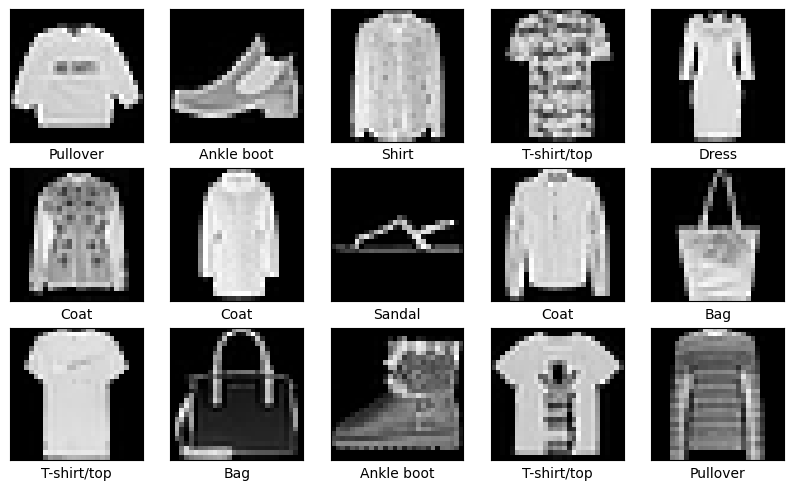

In [9]:
# Names of clothing accessories in order 

col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))  # overall layout(height and width) of (0-9) in "output"...
for i in range(15):
    plt.subplot(5,5,i+1)     # 5*5=15  "15 grid" in "output"  and subplots index starts at "1" not "0"...
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray') # x_train_reshape[i] index wise taking a matrix format(pixels) of (0-9) numbers mentioned in above cell.
    plt.xlabel(col_names[y_train_fashion[i]])   # exact matching of numbers names because it already stored in  "Fashion_minist.csv" dataset......
plt.show()

# Converting 1D - 2D by One heart encoding...(OUTPUT(Y))

In [11]:
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)
y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [12]:
y_train_fashion.shape # now 2-D

(60000, 10)

In [13]:
y_test_fashion.shape # now 2-D

(10000, 10)

# Creating a Neural network(brain) using ANN

In [15]:
#Creating base neural network

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)), # input(784) and 1st hidden layer(128)  with "relu" activation function..
    layers.Dropout(0.3),                                      # reducing the "accuracy" of training for good performance in testing...
    layers.BatchNormalization(),                              # like standardscalar() method...
    
    layers.Dense(24, activation='relu'),  # 2nd hidden layer with "relu" activation function ..
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),  # 3rd hidden layer  with "relu" activation function..
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'), # output layer  with "softmax" activation function..
])


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

#param_number = output_channel_number * (input_channel_number + 1)---Ex:128(784+1)=100,480......

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,130 (410.66 KB)

 Trainable params: 104,778 (409.29 KB)

 Non-trainable params: 352 (1.38 KB)

# Compiling and creating the model

In [18]:
# Compiling the model with "Hyper Tunning" parameters.... 

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])         # loss= finding error

In [19]:
# Model creation(Neural network learning)

history= model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=15,validation_data=(X_test_fashion, y_test_fashion))

Epoch 1/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5130 - loss: 1.4261 - val_accuracy: 0.8281 - val_loss: 0.5167
Epoch 2/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7375 - loss: 0.7723 - val_accuracy: 0.8389 - val_loss: 0.4686
Epoch 3/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7715 - loss: 0.6760 - val_accuracy: 0.8498 - val_loss: 0.4407
Epoch 4/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7828 - loss: 0.6468 - val_accuracy: 0.8534 - val_loss: 0.4765
Epoch 5/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7928 - loss: 0.6177 - val_accuracy: 0.8550 - val_loss: 0.4290
Epoch 6/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7994 - loss: 0.5963 - val_accuracy: 0.8623 - val_loss: 0.4701
Epoch 7/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8083 - loss: 0.5715 - val_accuracy: 0.8626 - val_loss: 0.4142
Epoch 8/15
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8092 - loss: 0.5758 - val_accuracy: 0.

In [20]:
#Predicting the model....

y_predict_fash = model.predict(X_test_fashion)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [21]:
#y_predict_fash

In [22]:
y_predict_fash[1]

array([1.3929748e-06, 9.9999499e-01, 2.5250634e-08, 1.2477308e-06,
       7.6042262e-08, 9.8550208e-09, 2.6409746e-08, 5.8713431e-07,
       5.1749701e-08, 1.7072567e-06], dtype=float32)

In [44]:
y_test_fashion

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [26]:
# argmax() will get the index of "maximum" value in the  above encoded vector "y_predict" automatically convert (2D-1D) Again...

y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)

In [28]:
y_predict_fash  # index == values here... (predicted output)

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

In [30]:
y_test_fash_eval  # index == values here...(Actual output)

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

# Model Evaluation

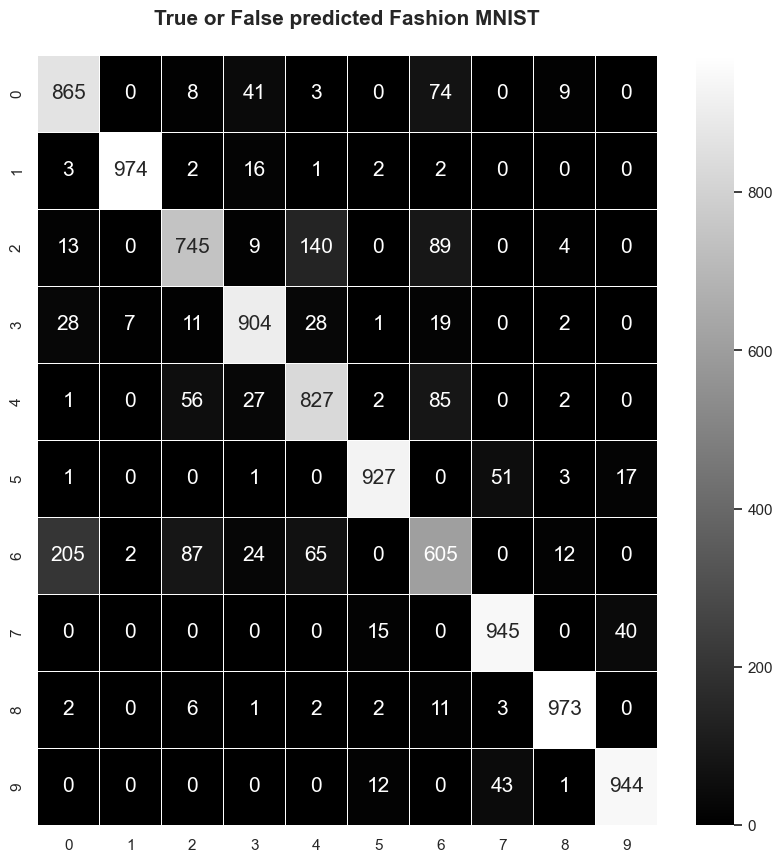

In [32]:
#Confusion matrix (Actual output - predicted output) and it's visualization...

con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [34]:
# creating "score_card" using Actual output and predicted output...

from sklearn.metrics import classification_report
print(classification_report(y_test_fash_eval,y_predict_fash))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.74      0.78      1000
           3       0.88      0.90      0.89      1000
           4       0.78      0.83      0.80      1000
           5       0.96      0.93      0.95      1000
           6       0.68      0.60      0.64      1000
           7       0.91      0.94      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Data Visulaization

In [37]:
print(history.history.keys()) # "history" is the variable of model creation above...

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


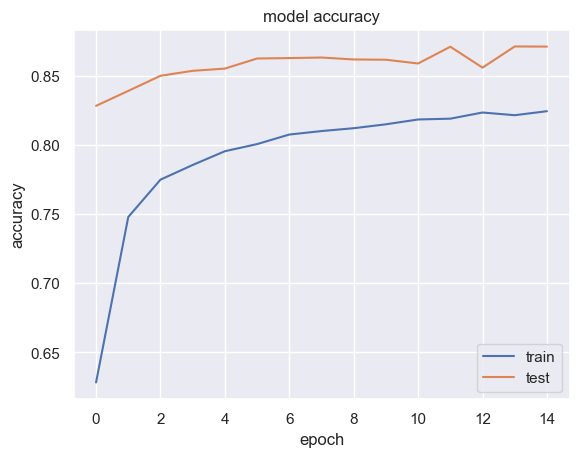

In [39]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


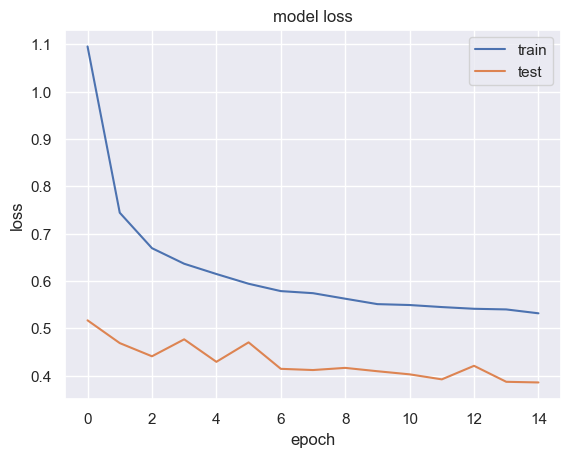

In [41]:
# summarize history for "loss function"...

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()